#### CSCI-UA.0473-​001 Introduction to Machine Learning

# Homework 6


### Name: Christina Liu


### Due: Dec. 11, 2019


## Goal:  The goal of this homework is to practice implementing the K-means algorithm and EM for Gaussian mixture models.

Below are all of the packages you will need for this assignment.  `cv2` refers to the package OpenCV, which you may need to install.  This can be done with the command

`pip install opencv-python`

OpenCV is a package for computer vision, but here we will only use it to help display images.  Do not alter the cell below or add any other packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.stats import multivariate_normal as normal # Multivariate normal distribution
from scipy.stats import multinomial # Multinomial distribution
import cv2 # OpenCV package for computer vision

## 1. Image segmentation with K-means

In this problem you will use the K-means clustering algorithm to segment an image into $K$ distinct colors.  The file name for the particular image you will work with is `wsq_park.jpg`.

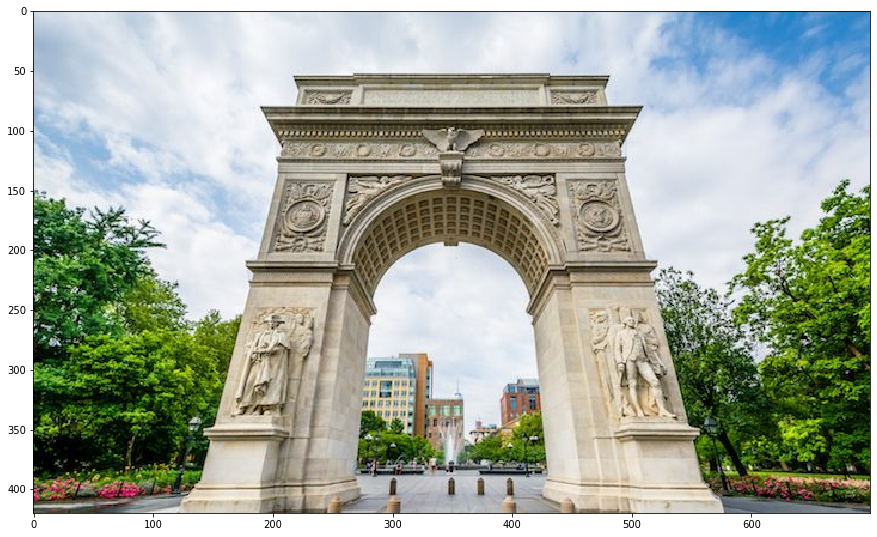

In [223]:
# Load the image and convert it from BGR (used by cv2) to RGB (used by matplotlib).
wsq_image = cv2.cvtColor(cv2.imread("wsq_park.jpg"), cv2.COLOR_BGR2RGB)
plt.figure(figsize = (15,10))
# Show the image.
plt.imshow(wsq_image);

Since each pixel has a red, blue, and green value we can think of each pixel as a vector ${\bf x}_i \in \mathbb{R}^3$ for $i=1,\ldots,N$, where $N$ is the number of pixels in the image.  Let ${\bf X} = [{\bf x}_1,\ldots, {\bf x}_N]^T \in \mathbb{R}^{N \times 3}$ be the dataset which is the collection of all of the pixels.  You will use K-means to cluster the points in the dataset together, which will effectively segment into regions of similar colors.  The code below processes the image for you to fit this format.

In [224]:
# The dataset X of all the pixel RGB values.
X = wsq_image.reshape((wsq_image.shape[0] * wsq_image.shape[1], wsq_image.shape[2]))

### Part (a) Implementing K-means

Start by implementing the `KMeans` class.  You need to fill in the following methods.

1. `fit`, the main K-means clustering algorithm to determine the cluster centers $\mu_j \in \mathbb{R}^3$ for $j = 1,\ldots,K$.
2. `compute_distances`, a method to compute the squared distances $\|{\bf x}_i - \mu_j\|^2$ for all $i=1,\ldots,N$ and $j = 1,\ldots,K$.
3. `distortion`, a method that computes the distortion $J$ defined by
$$
J = \sum_{i=1}^N \sum_{j=1}^K r_{ij} \|{\bf x}_i - \mu_j\|^2
$$
where
$$
r_{ij} = \begin{cases}
1 & \text{ if } \|{\bf x}_i - \mu_j\|^2 = \mathrm{min}_{l \in \{1,\ldots, K\}} \|{\bf x}_i - \mu_l\|^2\\
0 & \text{ otherwise }
\end{cases}
$$
In other words, $r_{ij}$ is 1 if data point ${\bf x}_i$ is assigned to cluster $j \in \{1,\ldots,K\}$ and 0 otherwise.

See the methods below for further description.  You may use the Numpy function `numpy.linalg.norm` to compute the norms of vectors.

In [7]:
class KMeans:
    
    """
    Initialize the K-means model.  Here labels denotes the numpy array of shape (N, ) where each entry at index
    i is an integer in {1,...,K} according to which cluster point x_i is assigned to.
    
    Input:
    K, int -- the number of clusters
    X, numpy.ndarray -- shape (N, d) where N is the number of data points and d is the dimension
    mu_0, numpy.ndarray -- shape (K, d) where K is number of clusters and d is the dimension, 
                           initialization of cluster centers
    """
    def __init__(self, K, X, mu_0):
        assert K == mu_0.shape[0]
        self.K = K
        self.X = X
        self.N = X.shape[0]
        self.mu = mu_0
        self.labels = None
    
    """
    The K-Means clustering algorithm.  Update the array of the means, m, as well as the array of labels
    for each point in the dataset.
    
    Input:
    iters, int -- the number of K-means iterations to perform
    
    Return:
    labels, numpy.ndarray -- numpy array of ints of shape (N, )
                             the cluster assignments (i.e. self.labels after it has been updated)
    """
    def fit(self, iters):
        labels = np.zeros(self.N)
        mu = self.mu
        
        ## TO DO STARTS HERE ##
        
        for _ in range(iters):
            distances = self.compute_distances()
            labels = np.argmin(distances, axis=1)
            self.mu = [np.mean(self.X[np.flatnonzero(labels == i)], axis=0) for i in range(self.K)]
        
        ## TO DO ENDS HERE ##
        
        # Ensure that the cluster assignments are integers.
        labels = labels.astype(int)
        self.labels = labels
        self.mu = mu
        return labels
    
    """
    Compute the squared distances from each point in the dataset to each cluster center in the array m.
    
    Return:
    dist, numpy.ndarray -- shape (N, K) of |x_i - mu_j|^2 for i=1,...,N and j=1,...,K
    """
    def compute_distances(self):
        
        ## TO DO STARTS HERE ##
        
        dist = np.zeros([self.N, self.K])
        for i in range(self.N):
            for j in range(self.K): 
                dist[i][j] = np.linalg.norm(self.X[i] - self.mu[j])**2
                
        ## TO DO ENDS HERE ##
        return dist
    
    """
    Compute the distortion J for the current clustering assignment.  Assume that the cluster assignments have
    already been computed after fit is called with at least 1 iteration.
    
    Return:
    J, float -- the distortion
    """
    def distortion(self):
        assert self.labels is not None   
        J = 0.
        ## TO DO STARTS HERE ##
        
        for i in range(self.N):
            J += np.linalg.norm(self.X[i] - self.mu[self.labels[i]])**2
            
        ## TO DO ENDS HERE ##
        return J

### Part (b)  Distortion and the Elbow Method

In this part you will determine the number of clusters to use for image segmentation by plotting the distortion $J$ for different $K$.  You must do the following.

1.  Use 15 iterations of K-means and compute the distortion for $K = 1,2,\ldots,9$.
2.  Approximately how many clusters should be used?  In other words, what value of $K$ corresponds to the "elbow" in the curve?

K = 1 finished.
K = 2 finished.
K = 3 finished.
K = 4 finished.
K = 5 finished.
K = 6 finished.
K = 7 finished.
K = 8 finished.
K = 9 finished.


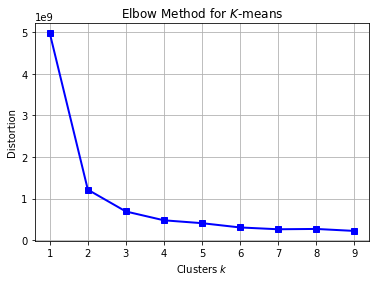

In [166]:
# Load the initial means for K-means.
initial_means = pickle.load(open("kmeans_initial_means.p", "rb"))

K = np.arange(1, 9 + 1, 1) # The array of K values, k = 1,2,...,9.
J = np.zeros(len(K)) # The array of the distortion values for the different k.

# Loop over all k = 1,2,...,9
for k in range(1, len(K) + 1):
    
    # Initialization of the cluster centers.
    mu_0 = initial_means[k - 1]
    
    # Compute the distortion.
    ## TO DO STARTS HERE ##
    
    kmeans = KMeans(k,X, mu_0) # K-means object in sci-kit learn with k clusters.
    kmeans.fit(15)              # This is the line that actually runs the K-means algorithm.
    J[k-1] = kmeans.distortion() # In sci-kit learn the distortion is called the inertia.

    ## TO DO ENDS HERE ##
    print('K = {:d} finished.'.format(k))

    
# Plot the results.
plt.plot(K, J, 'b-s', lw = 2)
plt.xlabel(r'Clusters $k$')
plt.ylabel(r'Distortion')
plt.title(r'Elbow Method for $K$-means')
plt.grid()
plt.show()

**Answer goes here**
Approximately 3 clusters, because K=3 corresponds to the "elbow" of the curve.


### Part (c)  Image Segmentation

Now use the $K$ you found in the previous part from the elbow method to cluster the dataset ${\bf X}$.  You will plot the segmented image, which now only uses $K$ distinct colors.  To do this you will need to do the following.

1.  Run K-means for 15 iterations using the $K$ you found in the previous part.  You may use any initialization you wish as long as your results converge.  Although you may want to use the provided initialization.

2.  Using the cluster assignments for each point create a new matrix ${\bf Y} \in \mathbb{R}^{N \times 3}$ where each row ${\bf y}_i \in \mathbb{R}^3$ is $\mu_j$, where $\mu_j$ is the center of the cluster $j$ that ${\bf x}_i$ is assigned to.  For example, if ${\bf x}_1$ is assigned to cluster 2, then the first row of ${\bf Y}$ is ${\bf y}_1 = \mu_2$.

3.  Since RGB values are integers between 0 and 255 (inclusive) you will need to do one of two things.  You can either round all of the results in ${\bf Y}$ to integers between 0 and 255, or you can normalize so that all values are floats between 0 and 1.  The `imshow` function will work with either of these.

Note that choosing a larger $K$ will result in an image closer to the original, so if the $K$ you found in the previous part is small then the segmented image will only use a few different colors.

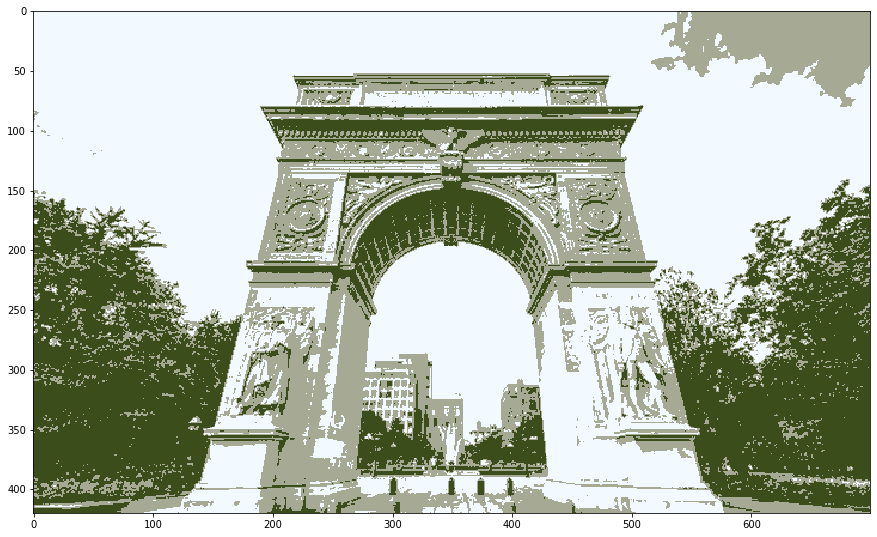

In [226]:
## TO DO STARTS HERE ##

kmeans = KMeans(3,X, initial_means[2])
kmeans.fit(15)
Y = kmeans.mu[kmeans.labels]
Y = Y/np.amax(Y)

## TO DO ENDS HERE ##
segmented_image = Y.reshape(wsq_image.shape)

plt.figure(figsize = (15, 10))
plt.imshow(segmented_image)
plt.show();

## 2.  Gaussian mixture models and the EM algorithm

In this problem you will implement the EM algorithm to fit a Gaussian mixture model.  

### Part (a)  Implementing a Gaussian mixture model
Recall that in a Gaussian mixture model there is a latent variable $z = i$ with probability $\phi_i$ for $i=1,\ldots,K$ so that ${\bf x}|z = i \sim \mathrm{Normal}(\mu_i,\ \Sigma_i)$ for $i=1,\ldots,K$.  Implement the GMM class by completing the following methods.
1. `fit` which simply optimizes over the parameters $\phi_i$, $\mu_i$, and $\Sigma_i$ using the EM algorithm.
2. `expectation_step` which computes the posterior probabilities 
$$
\gamma_{ik} = p(z = k| {\bf x}_i) = \frac{\phi_k N({\bf x}_i; \mu_k, \Sigma_k)}{\sum_{j=1}^K \phi_j N({\bf x}_i; \mu_j, \Sigma_j)}
$$
where $N({\bf x}_i; \mu_k, \Sigma_k)$ denotes the pdf of a multivariate normal distribution at the point ${\bf x}_i$ with mean $\mu_k$ and covariance $\Sigma_k$.
3. `maximization_step` which computes the updated values of the parameters $\phi,\mu,\Sigma$.

You are encouraged to use the `multivariate_normal` module that was loaded earlier.  For this part you do not need to implement the `sample` method, since this will be done later on.

In [32]:
class GMM:
    
    """
    Initialize a Gaussian mixture model with K clusters.

    Input:
    K, int -- the number of clusters
    X, numpy.ndarray -- shape (N, d) where N is the number of data points and d is the dimension
    phi_0, numpy.ndarray -- shape (K, ) where K is number of clusters, initialization of probability vector phi
    mu_0, numpy.ndarray -- shape (K, d), initialization of the cluster means
    cov_0, numpy.ndarray -- shape (K, d, d), initialization of the cluster covariance
    """
    def __init__(self, K, X, phi_0, mu_0, cov_0):
        
        # Verify that everything is the correct dimensions.
        assert phi_0.shape[0] == K
        assert mu_0.shape[0] == K
        assert cov_0.shape[0] == K
        assert mu_0.shape[1] == X.shape[1]
        assert mu_0.shape[1] == cov_0.shape[1]
        assert cov_0.shape[1] == cov_0.shape[2]
        
        self.K = K # Number of clusters
        self.X = X # Dataset
        self.N = X.shape[0] # Number of data points
        self.d = X.shape[1] # Dimension of the data
        
        # Initialize the means and covariances of the components.
        self.phi = phi_0
        self.mu = mu_0
        self.cov = cov_0
    
    """
    Fit the parameters of the Gaussian mixture model using the EM algorithm.  Alternate between
    the expectation and maximization steps.  Note that the maximization_step function will 
    update the parameters, so this method will not return anything.
    
    Input:
    iters, int -- the number of iterations to perform
    """
    def fit(self, iters):
        ## TO DO STARTS HERE ##

        for i in range(iters):
            gamma = self.expectation_step()
            self.maximization_step(gamma)
            
        ## TO DO ENDS HERE ##
    
    """
    Perform the expectation step in the EM algorithm by computing the posterior
    probabilities gamma_{ik} = p(z = k| x_i) for i = 1,...,N and k = 0,...,K-1.
    
    Return:
    gamma, numpy.ndarray -- shape (N, K) of the posterior probabilities
    """
    def expectation_step(self):
        gamma = np.zeros((self.N, self.K))
        ## TO DO STARTS HERE ##

        for i, x_i in enumerate(self.X):
            denominator = np.sum(np.array([self.phi[j]*normal.pdf(x_i, mean = self.mu[j], cov = self.cov[j]) for j in range(self.K)]))
            for k in range(self.K):
                numerator = self.phi[k]*normal.pdf(x_i, mean = self.mu[k], cov = self.cov[k])
                gamma[i, k] = numerator/denominator
        
        ## TO DO ENDS HERE ##     
        return gamma
    
    """
    Perform the maximization step in the EM algorithm by computing the updated phi, mu, and cov.
    
    Input:
    gamma, numpy.ndarray -- shape (N, K) of the posterior probabilities p(z = k|x_i)
    """
    def maximization_step(self, gamma):
        phi = np.zeros(self.K)
        mu = np.zeros((self.K, self.d))
        cov = np.zeros((self.K, self.d, self.d))
        ## TO DO STARTS HERE ##
        
        N= np.sum(gamma, axis=0)
        assert N.shape==(self.K,)
        for k in range(self.K):
            mu[k] = np.dot(gamma[:,k],self.X)/N[k]
            phi[k] = N[k]/self.N
            sub = np.subtract(self.X,mu[k])
            cov[k]=np.sum([gamma[i,k]*np.outer(sub[i],sub[i].T) for i in range(self.N)], axis =0)

        ## TO DO ENDS HERE ##
        self.phi = phi
        self.mu = mu
        self.cov = cov
    
    """
    Draw n_samples from the mixture model p(x).  Assume that the parameters have already been fit.
    
    Input:
    n_samples, int -- the number of samples from p(x) to draw

    Return:
    X_sampled, numpy.ndarray -- shape (n_samples, d) samples
    """
    def sample(self, n_samples):
        X_sampled = np.zeros((n_samples, self.d))
        ## ONLY FOR PART C.
        ## TO DO STARTS HERE ##
        n_total = 0
        latent = multinomial.rvs(n_samples, self.phi,size=1)
        for i in range (len(latent[0])):
            for n in range(latent[0][i]):
                X_sampled[n_total]= normal.rvs(self.mu[i],self.cov[i],size=1)
                n_total = n_total+1
        ## TO DO ENDS HERE ##
        return X_sampled

### Part (b) Toy dataset and comparison with K-means

You will now test your GMM and EM implemention on the 2-dimensional toy dataset below with 2 components for the mixture model (i.e. $K = 2$).  In particular, we assume that the true parameters of the mixture model are
$$
\phi = (0.5,\ 0.5),\quad \mu_0 = \begin{bmatrix} 0\\0 \end{bmatrix},\quad \mu_1 = \begin{bmatrix}10\\0\end{bmatrix}
$$
and
$$
\Sigma_0 = \Sigma_1 = \begin{bmatrix}
1 & 0\\
0 & 10^4
\end{bmatrix}
$$

X has shape  (50, 2)


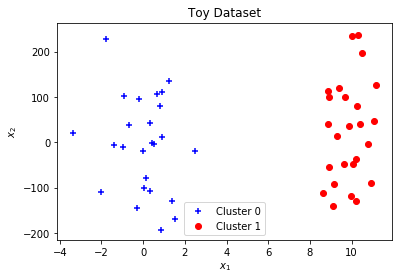

In [33]:
K = 2 # Number of clusters

X_0 = normal.rvs(size = 25, mean = np.zeros(2), cov = np.array([[1, 0], [0, 1e4]])) # Points from the first cluster.
X_1 = normal.rvs(size = 25, mean = np.array([10, 0]), cov = np.array([[1, 0], [0, 1e4]])) # Points from the second cluster.
X = np.vstack([X_0, X_1])
print("X has shape ", X.shape)

plt.scatter(X_0[:,0], X_0[:,1], c = 'b', marker = '+', label = 'Cluster 0')
plt.scatter(X_1[:,0], X_1[:,1], c = 'r', marker = 'o', label = 'Cluster 1')
plt.legend()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title(r'Toy Dataset')
plt.show()

Your task is the following.

1.  Fit both a Gaussian mixture model and K-means, each with $K = 2$ clusters, using the initial parameters provided below and 50 iterations each.
2.  Since GMM gives a "soft-clustering" we can assign cluster labels based on which cluster has the highest posterior probability $p(z = k|{\bf x}_i)$.  In other words, assign the point ${\bf x}_i$ to cluster $k$ if
$$
p(z = k|{\bf x}_i) = \mathrm{max}_{j \in \{0,\ldots,K-1\}}p(z = j|{\bf x}_i)
$$
Let ${\bf y} \in \{0,1\}^N$ denote the results of the clustering.  In other words, ${\bf y}_i = 1$ if ${\bf x}_i$ is assigned to cluster 1 and 0 if it is assigned to cluster 0.  Compute the cluster assignments for both GMM and K-means.  Explain in words why you obtain the clusterings you do using the different methods.

In [53]:
# The initial conditions for the first model.  The true parameters for the model.
phi_0 = np.array([0.5, 0.5])
mu_0 = np.array([[0, 0], [10, 0]])
cov_0 = np.array([[[1, 0], [0, 1e4]], [[1, 0], [0, 1e4]]])


## TO DO STARTS HERE ##

kmeans = KMeans(2,X, mu_0)
kmeans_labels = kmeans.fit(50)
print('Labels for K-means: ',kmeans_labels)
gmm = GMM(2, X, phi_0, mu_0, cov_0)
gmm.fit(50)
gmm_final = gmm.expectation_step()
# gmm_labels = np.array([np.argmax(p_i)] for i, p_i in enumerate(gmm.X))
gmm_labels = normal.pdf(gmm.X[0], mean = gmm.mu[0], cov=gmm.cov[0])
print('Labels for GMM: ',gmm_final)

## TO DO ENDS HERE ##

Labels for K-means:  [0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0
 1 0 0 1 1 1 1 0 0 1 0 1 0]
Labels for GMM:  [[0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]
 [0.5 0.5]]


**Answer goes here**

We get different clusterings from the k-means method and the GMM method because k-means assumes clusters as spherical and gives hard assignments (which leads to mis-grouping), while GMM uses probability of a sample to determine the feasibility of it belonging to a cluster and does not assume the cluster has any geometry. 

### Part (c)  Sampling from a Gaussian mixture model

Because a Gaussian mixture model describes a probability distribution over the features ${\bf x}$, we can use it to sample new features and greatly increase the total number of samples we have.

1. Finish the implementation of the `GMM` class by completing the `sample` method, which draws many samples from $p(x)$.  It is recommended to use both the `multivariate_normal` and `multinomial` modules that were loaded earlier.
2. Draw 1000 samples from the Gaussian mixture model you learned in the previous part.  Assign each of the newly sampled points to a cluster depending on their posterior probabilities $p(z = k|{\bf x}_i)$.

<generator object <genexpr> at 0x1a291efe58>


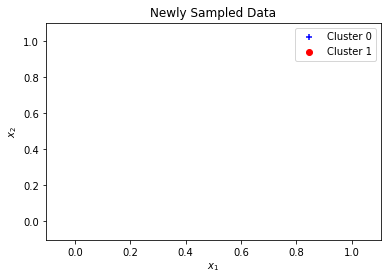

In [50]:
X_sampled = None # The newly sampled data.
y = None # The vector of cluster assignment labels.

## TO DO STARTS HERE ##

X_sampled = gmm.sample(1000)
y=gmm_labels

## TO DO ENDS HERE ##

plt.scatter(X_sampled[y == 0,0], X_sampled[y == 0,1], c = 'b', marker = '+', label = 'Cluster 0')
plt.scatter(X_sampled[y == 1,0], X_sampled[y == 1,1], c = 'r', marker = 'o', label = 'Cluster 1')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title(r'Newly Sampled Data')
plt.legend()
plt.show();

## 3.  K-means with outliers

Consider the following 1-dimensional dataset.
$$
{\bf X} = [-3,\ -2,\ -1,\ 1,\ 2,\ 3]^T
$$
Answer the following questions.

1.  Suppose you run K-means with 2 clusters with initial means $\mu_0 = -3$ and $\mu_1 = 3$.  What will be the resulting clusters?
2.  Now suppose we replace the last point with $x_6 = 99$ instead of 3.  Using the same initial means as before, what will be the result of $K$-means?
3.  Suppose that instead of computing the cluster means at each step, we compute the cluster medians.  This algorithm is called K-medians.  Using the same initial centers as with K-means (and with $x_6 = 99$ still).  What will be the resulting cluster centers?  Briefly explain how K-medians handles outliers compared to how K-means handles outliers.

**Answer goes here**
1. The resulting clusters would be $\mu_0 = -2$ and $\mu_1 = 2$.
2. If we replace the last point with $x_6 = 99$ instead of $3$, the resulting clusters would be $\mu_0 = -2$ and $\mu_1 = 34$.
3. The resulting cluster centers using K-medians would be $\mu_0 = -2$ and $\mu_1 = 2$. Outliers really affect the results of K-means because it takes the outliers in consideration when calculating the means, however, K-medians ignores the outliers because it computes the cluster medians and an outlier is at the ends of the data (so they do not affect the results of K-medians).